<a href="https://colab.research.google.com/github/gkpatell/INDE-577-Final-Project/blob/main/Unsupervised%20Learning/DBSCAN/USL_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


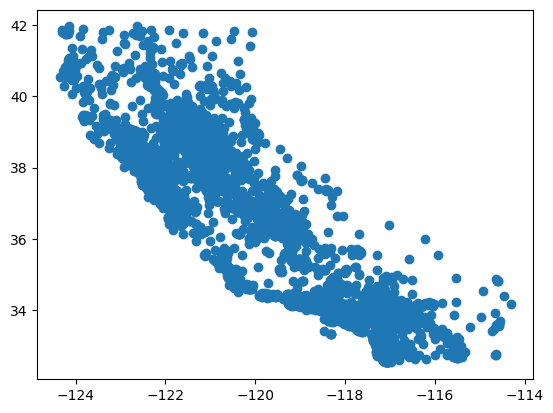

In [ ]:
lat_long = df[['latitude', 'longitude']]
lat, longg = df.latitude, df.longitude

plt.scatter(longg, lat)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

X = lat_long.to_numpy()

dbscan_cluster_model = DBSCAN(eps = 0.2, min_samples = 15).fit(X)
dbscan_cluster_model

DBSCAN(eps=0.2, min_samples=15)

In [ ]:
df['cluster'] = dbscan_cluster_model.labels_
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,-1
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,-1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,-1
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,-1
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,-1
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,9
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,9
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,-1
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,-1


In [ ]:
df['cluster'].value_counts()

,count
cluster,
2,9065
4,6999
-1,401
7,219
9,95
0,84
6,77
3,21
5,18


In [ ]:
import plotly.express as px

fig = px.scatter(x=longg, y=lat, color = df['cluster'])
fig.show()

In [ ]:
from sklearn.metrics import silhouette_score as ss

ss(X, df['cluster'])

0.25721908993836395

In [ ]:
epsilons = np.linspace(0.01, 1, num = 15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [ ]:
min_samples = np.arange(2, 20, step = 3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [ ]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [ ]:
N = len(combinations)
N

90

In [ ]:
def get_scores_and_lables(combinations, X):
    scores = []
    all_labels_list = []

    for i, (eps, num_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps = eps, min_samples = num_samples).fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set) - (1 if -1 in labels_set else 0)

        if (num_clusters < 2) or (num_clusters > 50):
          scores.append(-10)
          all_labels_list.append('bad')
          c = (eps, num_samples)
          print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
          continue

        scores.append(ss(X, labels))
        all_labels_list.append(labels)
        print(f"Index: {i}, Score: {scores[-1]}, Lables: {all_labels_list[-1]}, NumClusters: {num_clusters}")

    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]

    return {'best_epsilon' : best_parameters[0],
            'best_min_samples' : best_parameters[1],
            'best_labels' : best_labels,
            'best_score' : best_score}

best_dict = get_scores_and_lables(combinations, X)
best_dict

Combination (0.01, 2) on iteration 1 of 90 has 2170 clusters. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 945 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 394 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 179 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 75 clusters. Moving on
Index: 5, Score: -0.7351371201118361, Lables: [-1 -1 -1 ... -1 -1 -1], NumClusters: 36
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 130 clusters. Moving on
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 70 clusters. Moving on
Combination (0.08071428571428571, 8) on iteration 9 of 90 has 54 clusters. Moving on
Index: 9, Score: 0.2241184716489065, Lables: [-1 -1 -1 ... -1 -1 -1], NumClusters: 50
Index: 10, Score: 0.23025110810727797, Lables: [-1 -1 -1 ... -1 -1 -1], NumClusters: 45
Index: 11, Score: 0.25576779449421544, Lables: [-1 -1 -1 ... -1 -1 -1], NumClusters: 40
Combination (0.15142857142857144, 2) o

{'best_epsilon': 0.29285714285714287,
 'best_min_samples': 14,
 'best_labels': array([-1, -1, -1, ..., -1, -1,  4]),
 'best_score': 0.4066290757338104}

In [ ]:
df['cluster'] = best_dict['best_labels']

df['cluster'].value_counts()

,count
cluster,
0,9417
2,7221
-1,202
4,103
3,35
1,22


In [ ]:
fig = px.scatter(x=longg, y=lat, color = df['cluster'])
fig.show()

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,-1
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,-1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,-1
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,-1
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,-1
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,4
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,4
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,-1
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,-1


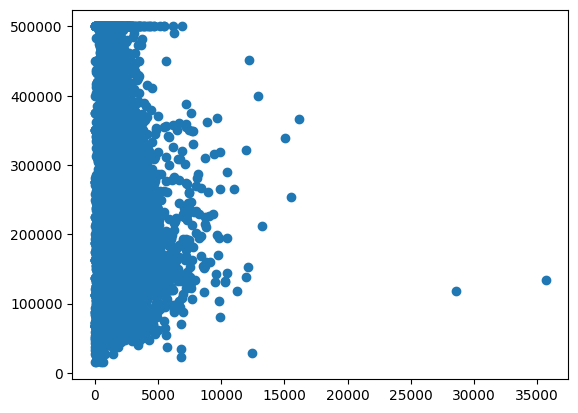

In [ ]:
plt.scatter(df['population'], df['median_house_value'])
plt.show()

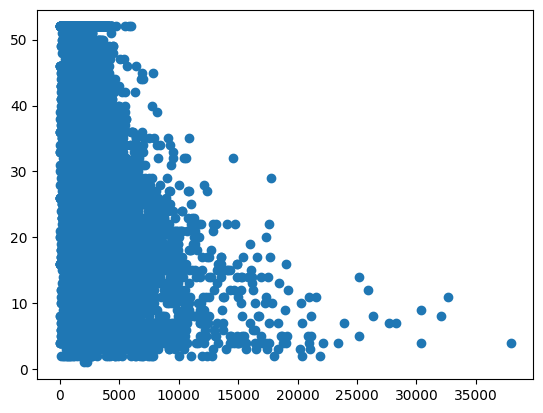

In [ ]:
plt.scatter(df.total_rooms, df.housing_median_age)

In [ ]:
X2 = df[['total_rooms', 'housing_median_age']].to_numpy()
X2

array([[5612.,   15.],
       [7650.,   19.],
       [ 720.,   17.],
       ...,
       [2677.,   17.],
       [2672.,   19.],
       [1820.,   52.]])

In [ ]:
best_dict_2 = get_scores_and_lables(combinations, X2)
best_dict_2

Combination (0.01, 2) on iteration 1 of 90 has 863 clusters. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 0 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 0 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 0 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 0 clusters. Moving on
Combination (0.01, 17) on iteration 6 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 863 clusters. Moving on
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 8) on iteration 9 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 11) on iteration 10 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 14) on iteration 11 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 17) on iteration 12 of 90 has 0 clusters. Moving on
Combination (0.15142857142857144, 2) on iteration 13 of 90 has 863 cl

{'best_epsilon': 0.01,
 'best_min_samples': 2,
 'best_labels': 'bad',
 'best_score': -10}

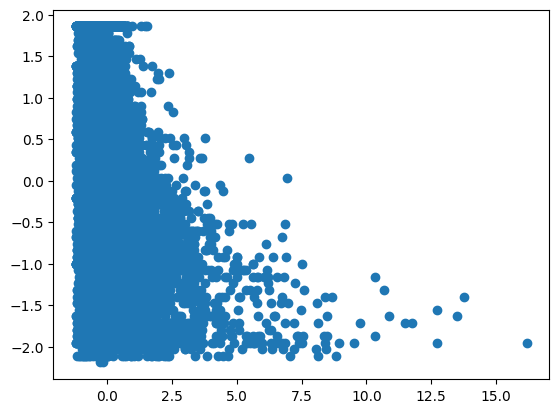

In [ ]:
from sklearn.preprocessing import StandardScaler

X2_scaled = StandardScaler().fit_transform(X2)

plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1])

In [ ]:
best_dict_3 = get_scores_and_lables(combinations, X2_scaled)

Combination (0.01, 2) on iteration 1 of 90 has 1884 clusters. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 685 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 337 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 133 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 60 clusters. Moving on
Index: 5, Score: -0.5312324216453211, Lables: [-1 -1 -1 ... -1 -1 11], NumClusters: 32
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 99 clusters. Moving on
Index: 7, Score: -0.20384053173649058, Lables: [ 0 -1  0 ...  0  0  0], NumClusters: 34
Index: 8, Score: -0.1828630389511955, Lables: [ 0 -1  0 ...  0  0  0], NumClusters: 23
Index: 9, Score: -0.22366221116925375, Lables: [ 0 -1  0 ...  0  0  0], NumClusters: 23
Index: 10, Score: -0.23893089977584267, Lables: [ 0 -1  1 ...  1  1  1], NumClusters: 10
Index: 11, Score: -0.1439507321917493, Lables: [-1 -1  0 ...  0  0  0], NumClusters: 7
Index: 12, Score: 0.170115222274

In [ ]:
best_dict_3

{'best_epsilon': 0.8585714285714285,
 'best_min_samples': 2,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0]),
 'best_score': 0.8739122955987667}

In [ ]:
fig = px.scatter(x = X2_scaled[:,0], y=X2_scaled[:, 1], color = best_dict_3['best_labels'])
fig.show()